### Project
# People Analytics
## Joseph Awad

### 1. Exploratory data analytics

Importing all the needed modules

In [441]:
# Import libraries
import pandas as pd # Dataframe handling
import numpy as np # Numeric python, functions for calculations

import matplotlib.pyplot as plt # graphs

import plotly.express as px
# import plotly.graph_objects as go # and more graphs
import seaborn as sns

from sklearn.preprocessing import LabelEncoder #for processing categorical non numeric values

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [273]:
df_people = pd.read_csv("./Group_1_dataset.csv")
print(df_people.columns)
df_people.info()


Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   31

We need to know what these variables are and how they are related.

In [336]:
df_people[["DOB", "Employee_Name"]][0:9]
print(df_people[["EmploymentStatus", "EmpStatusID", "Salary", "PerfScoreID", "PerformanceScore","MaritalStatusID","MarriedID","MaritalDesc", "Sex", "GenderID", "EngagementSurvey"]][0:20])
df_people.head(10)
df_people.groupby(["PerfScoreID", "PerformanceScore"]).count()

#Aparently someone has PerfScore of 1 (which is very low) and their score says fully meets. That is not right but we can disregard it as noise.
df_people[df_people["PerfScoreID"]==1][df_people["PerformanceScore"]=='Fully Meets']

          EmploymentStatus  EmpStatusID  Salary  PerfScoreID PerformanceScore  \
0                   Active            1   62506            4          Exceeds   
1   Voluntarily Terminated            5  104437            3      Fully Meets   
2   Voluntarily Terminated            5   64955            3      Fully Meets   
3                   Active            1   64991            3      Fully Meets   
4   Voluntarily Terminated            5   50825            3      Fully Meets   
5                   Active            1   57568            4          Exceeds   
6                   Active            1   95660            3      Fully Meets   
7                   Active            1   59365            3      Fully Meets   
8                   Active            3   47837            3      Fully Meets   
9                   Active            1   50178            3      Fully Meets   
10  Voluntarily Terminated            5   54670            3      Fully Meets   
11  Voluntarily Terminated  

/tmp/ipykernel_312460/3654633123.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
64,"Dee, Randy",10311,1,1,1,1,6,1,0,56991,...,Brannon Miller,12.0,Indeed,Fully Meets,4.3,4,3,1/31/2019,2,2


### 2. Data cleaning

How many null values do we have?

In [337]:
null_count_columns = df_people.isnull().sum()

print("Null values per column:")
print(null_count_columns)

Null values per column:
Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource       

All the null values are in date of termination. Makes sense because most employees are still working so they don't yet have a date of termination.

Let's just change it for -1

In [340]:
df_people=df_people.fillna(-1)
null_count_columns = df_people.isnull().sum()

print("Null values per column:")
print(null_count_columns)

Null values per column:
Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey

Let's change all the dates to usable integer numbers. For example I'd like to know the age so I subtract the current date from the DOB:

In [341]:
#I want to change all dates to usable numbers: years or months from today. Like the age for example:
df_days = df_people.copy()
#For age
df_days["DOB"]= pd.to_datetime(df_days['DOB'], format="mixed")
df_days['Age'] = ((pd.Timestamp.now() - df_days['DOB']).dt.total_seconds()/(60*60*24*365)).astype('int')
df_days['Age'] = df_days['Age'].abs() #This is to make sure all ages are positive. Apparently some get transformed to a negatvie number for some weird reason.
#Months from hiring:
df_days['DateofHire'] = pd.to_datetime(df_days['DateofHire'])
df_days['MonthsfromHire'] = ((pd.Timestamp.now() - df_days['DateofHire']).dt.total_seconds()/(60*60*24*30)).astype('int')
#Months from termination
#Null values are parsed as -1
df_days['DateofTermination'] = pd.to_datetime(df_days['DateofTermination'])
df_days['MonthsfromTermination'] = ((pd.Timestamp.now() - df_days['DateofTermination']).dt.total_seconds()/(60*60*24*30)).fillna(-1).astype('int')
#Months since last performance review
#Null values are parsed as -1
df_days['LastPerformanceReview_Date'] = pd.to_datetime(df_days['LastPerformanceReview_Date'])
df_days['MonthsSince_LastPerformanceReview'] = ((pd.Timestamp.now() - df_days['LastPerformanceReview_Date']).dt.total_seconds()/(60*60*24*30)).fillna(-1).astype('int')
#df_days.head(10)
df_days.info()
print(df_days.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Employee_Name                      311 non-null    object        
 1   EmpID                              311 non-null    int64         
 2   MarriedID                          311 non-null    int64         
 3   MaritalStatusID                    311 non-null    int64         
 4   GenderID                           311 non-null    int64         
 5   EmpStatusID                        311 non-null    int64         
 6   DeptID                             311 non-null    int64         
 7   PerfScoreID                        311 non-null    int64         
 8   FromDiversityJobFairID             311 non-null    int64         
 9   Salary                             311 non-null    int64         
 10  Termd                              311

All the id columns are not going to be useful for our analysis. Because we have Sex and GenderID. It's like having the same variable twice.

In [334]:
#SPLIT QUANT AND CATEGORICAL

df_quant = df_days[['PerfScoreID', 'Salary','DaysLateLast30','Absences', 'Age', 'MonthsfromHire', 'MonthsfromTermination',
                    'MonthsSince_LastPerformanceReview',  'EmpSatisfaction', 'SpecialProjectsCount']]

df_categorical = df_days[['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'FromDiversityJobFairID', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 
       'EmploymentStatus','Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'EngagementSurvey', 'LastPerformanceReview_Date']]

### 3. Descriptive analytics


#### Now we can ask some questions

Let's see how the distribution of age looks like. And look for outliers in case there are any.

In [97]:
fig = px.box(df_days, y='Age', width=1024, height=576, title="Box Plot of Age of Employees")
fig.show()
fig = px.histogram(df_days, x='Age', width=1024, height=576, title="Distribution of Age of Employees")
fig.show()

What about salaries?

In [117]:
fig = px.box(df_days, y='Salary', width=1024, height=576, title="Box Plot of Salary of Employees")
fig.show()
fig = px.histogram(df_days, x='Salary', width=1024, height=576, title="Distribution of Salary of Employees")
fig.show()

Who are the outliers?

My first guess is position. How much do people earn according to their position?

In [154]:
#I'd like to know the average salary per each job position (courtesy of CGPT):
grouped_df=df_days.groupby('Position')['Salary'].mean().reset_index()
grouped_df = grouped_df.sort_values('Salary', ascending=False)
fig = px.bar(grouped_df, x='Position', y="Salary", width=1024, height=576, title="Average salary for each role")
fig.show()

How much do people earn according to their race?

In [269]:
#I'd like to know the average salary for each race:
grouped_df=df_days.groupby('RaceDesc')['Salary'].mean().reset_index()
grouped_df = grouped_df.sort_values('Salary', ascending=False)
fig = px.bar(grouped_df, x='RaceDesc', y="Salary", width=1024, height=576, title="Average salary for each Race", color="RaceDesc")
fig.show()

# fig = px.histogram(df_days, x='RaceDesc', y='Salary', width=1024, height=576, title="Distribution of Salary of Employees")
# #ALERT MISLEADING GRAPH!!!!!!!!!!!!!!!!
# fig.show()

In our data frame we have a reason for termination so...

Why do employees go away?

In [271]:
new_df = df_people.groupby(['TermReason']).size().reset_index(name='counts')
# Filter out 'n/a still employed'
new_df = new_df[new_df['TermReason'] != 'N/A-StillEmployed']
# new_df = new_df["TermReason"].value_counts().head(10)
new_df=new_df.sort_values(by='counts', ascending=False).head(10)

fig = px.bar(new_df, x='TermReason', y='counts', color='TermReason', 
             title='Top reasons for termination', width=1024, height=576)
fig.update_layout(xaxis={'title': 'Termination reasons'}, 
                  yaxis={'title': 'Count of Individuals for each termination reason'})

How is compensation affected by citizenship status?

In [353]:
# fig = px.histogram(df_days, x='CitizenDesc', y='Salary', width=1024, height=576, title="Distribution of Salary of Employees")   #MISLEADING ALERT!. You should get the average for each category.
grouped_df=df_days.groupby('CitizenDesc')['Salary'].mean().reset_index()
grouped_df = grouped_df.sort_values('Salary', ascending=False)
fig = px.bar(grouped_df, x='CitizenDesc', y="Salary", width=1024, height=576, title="Average salary for each citizenship status", color="CitizenDesc")
fig.show()

How big are the pay gaps according to gender?

In [346]:
grouped_df=df_days.groupby(['Department','Sex'])['Salary'].mean().unstack()
#grouped_df = grouped_df.groupby('Department')['Salary'].mean()
#grouped_df = grouped_df.sort_values('Salary', ascending=False)
fig = px.bar(grouped_df, width=1024, height=576, title="Average salary for each Sex")
fig.show()

How satisfied are employees with their managers?

In [343]:
grouped_df=df_days.groupby(["ManagerName"])['EmpSatisfaction'].mean().reset_index()
grouped_df = grouped_df.sort_values('EmpSatisfaction', ascending=False)
fig = px.bar(grouped_df, x="ManagerName", y="EmpSatisfaction", width=1024, height=576, title="Employee Satisfaction for each manager")
fig.show()

97      Sr. Accountant
150    President & CEO
Name: Position, dtype: object

Who's managed by the board of directors?

In [344]:
df_days[df_days["ManagerName"]=="Board of Directors"]["Position"]

97      Sr. Accountant
150    President & CEO
Name: Position, dtype: object

What are the correlations between the quantitative variables?

Lets analyze correlation between the existing variables using sns

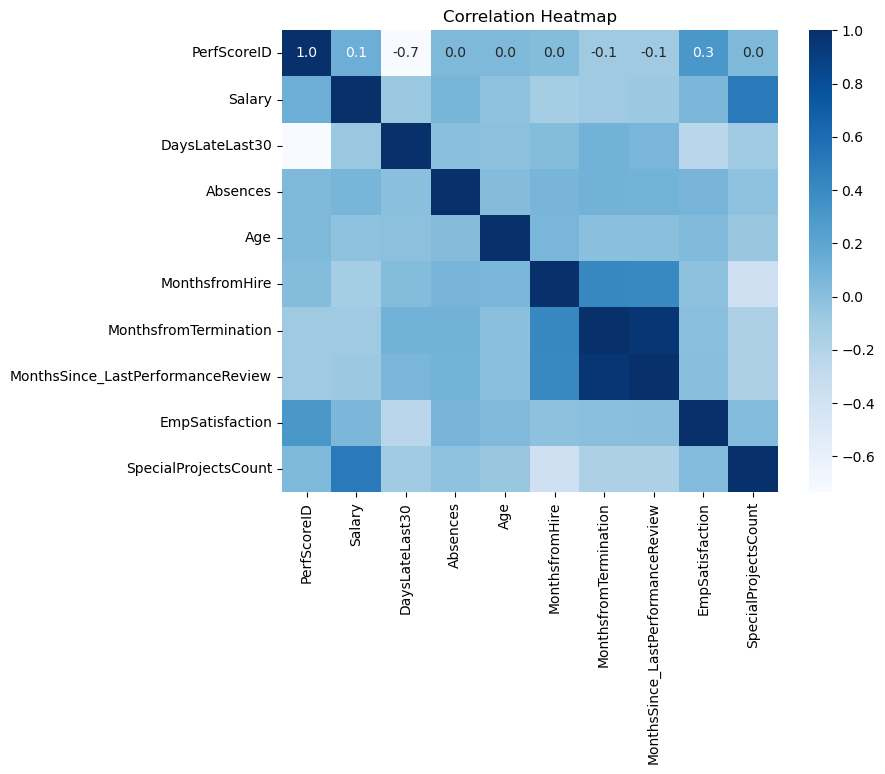

In [365]:
# df_noNames = df_days.drop(["Employee_Name", "EmpID"], axis=1)
# for column in df_noNames.columns:
#     if df_noNames[column].dtype == 'object':
#         df_noNames[column] = LabelEncoder().fit_transform(df_noNames[column])   #I use label encoder to transform the categorical values to numerical.

# # corr_matrix = df_noNames.corr()
# # fig, ax = plt.subplots(figsize=(13,10))
# # sns.heatmap(data=corr_matrix, annot=True, fmt=".1f", cmap="Blues", ax=ax)
# # plt.title("Correlation Heatmap")
# # plt.show()

corr_matrix = df_quant.corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data=corr_matrix, annot=True, fmt=".1f", cmap="Blues", ax=ax)
plt.title("Correlation Heatmap")
plt.show()

Is there any trend for compensation? There seems to be a correlation between salary and number of "Special projects"

We can create a simple linear regression

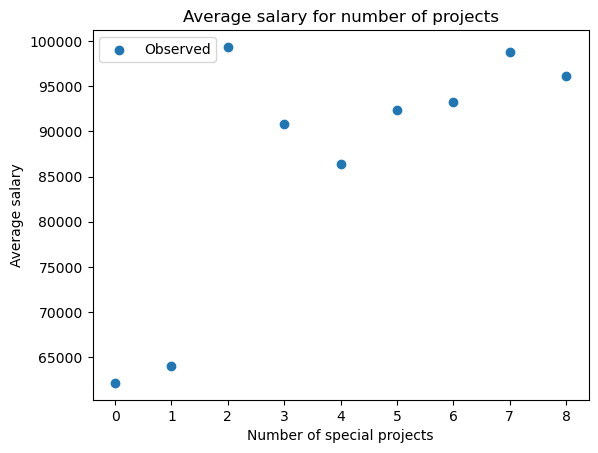

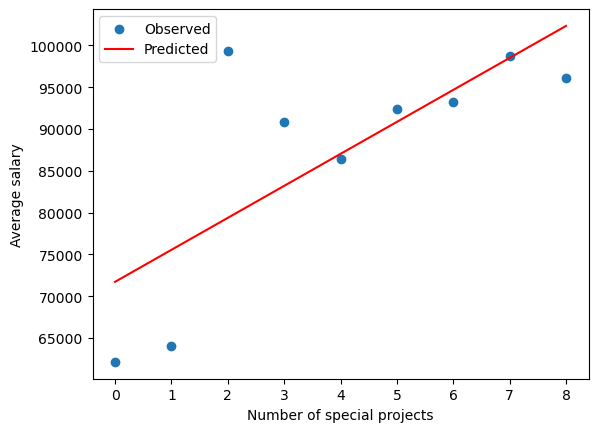

In [447]:
#Setting the value for X and Y
grouped_df = df_days.groupby(["SpecialProjectsCount"])['Salary'].mean().reset_index()
grouped_df.head(10)


x = np.array(grouped_df['SpecialProjectsCount']).reshape(-1, 1)
y = grouped_df['Salary']
plt.scatter(x=x, y=y, label = "Observed")
plt.title("Average salary for number of projects")
plt.xlabel("Number of special projects")
plt.ylabel("Average salary")
plt.legend()
plt.show()

model = LinearRegression().fit(x.reshape(-1, 1), y)
model.score(x, y) 

y_pred = model.predict(x)

#plt.figure(figsize=(5,5)) # Define the graph size
plt.scatter(x, y, label="Observed") # plot the datapoints
plt.plot(x,y_pred, 'r',label=f"Predicted") # plot the regression line with the predicted/adjusted values
plt.xlabel("Number of special projects")
plt.ylabel("Average salary")
plt.legend() # Add the legend
plt.show() # Show the plot

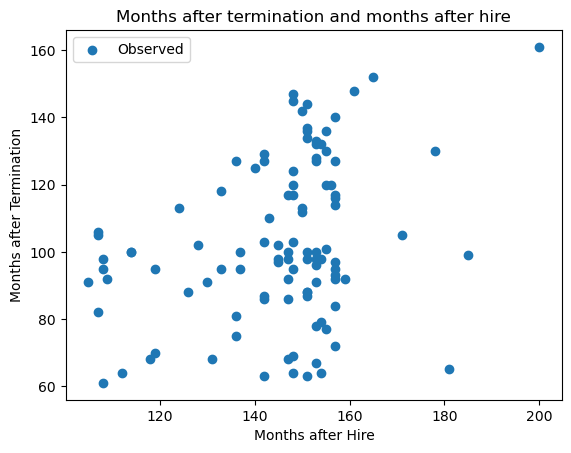

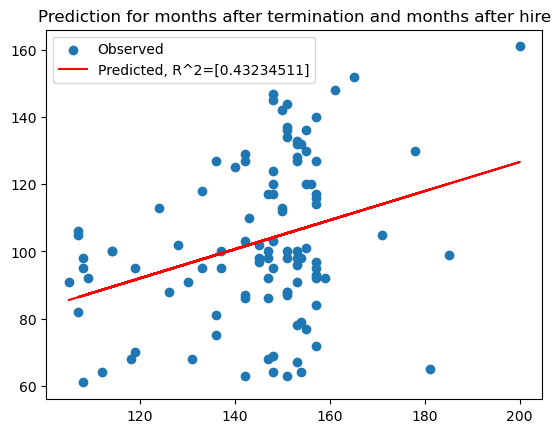

In [446]:
# fig = px.scatter(df_quant[df_quant["MonthsfromTermination"]>0], x="MonthsfromTermination", y="MonthsfromHire", width=1024, height=576)
# fig.show()
x = np.array(df_quant[df_quant["MonthsfromTermination"]>0]["MonthsfromHire"]).reshape(-1, 1)
y = df_quant[df_quant["MonthsfromTermination"]>0]['MonthsfromTermination']
plt.scatter(x=x, y=y, label = "Observed")
plt.title("Months after termination and months after hire")
plt.xlabel("Months after Hire")
plt.ylabel("Months after Termination")
plt.legend()
plt.show()

model = LinearRegression().fit(x.reshape(-1, 1), y)
model.score(X=x, y=y) 
rsquared = model.coef_

y_pred = model.predict(x)

#plt.figure(figsize=(5,5)) # Define the graph size
plt.scatter(x, y, label="Observed") # plot the datapoints
plt.plot(x,y_pred, 'r',label=f"Predicted, R^2={rsquared}") # plot the regression line with the predicted/adjusted values
plt.title("Prediction for months after termination and months after hire")
plt.legend() # Add the legend
plt.show() # Show the plot

There is correlation but it doesn't seem to be very strong.

## Clustering

In [477]:
from sklearn.preprocessing import StandardScaler # To scale the numbers (BIIIIIG numbers and smaaaal numbers)

df_scaled = df_people.copy()
numcols = list(df_scaled.dtypes[df_scaled.dtypes == "float64"].index)

scaler = StandardScaler()
df_scaled[numcols] = scaler.fit_transform(df_scaled[numcols])

df_scaled.head()


# df_scaled = df_quant.copy()
# numcols = list(df_quant)

# scaler = StandardScaler()
# df_scaled[numcols] = scaler.fit_transform(df_scaled[numcols])

# df_scaled.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,0.939534,LinkedIn,Exceeds,0.621302,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,-1.220429,Indeed,Fully Meets,1.077769,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,0.699538,LinkedIn,Fully Meets,-1.382080,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,0.219546,Indeed,Fully Meets,0.925613,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,2.979498,Google Search,Fully Meets,1.128487,4,0,2/1/2016,0,2


In [478]:
catcol_idx = [df_scaled.columns.get_loc(col) for col in list(df_scaled.select_dtypes('object').columns)]
catcol_idx
# catcol_idx = list(df_categorical.columns)

[0, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 33]

In [479]:
cost=[]
K = range(1,10)
for num_clusters in list(K):
    kproto = KPrototypes(n_clusters=num_clusters, init='random', n_init = 1, n_jobs=4)
    kproto.fit_predict(df_scaled, categorical=catcol_idx)
    cost.append(kproto.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

TypeError: '<' not supported between instances of 'str' and 'int'

## Clustering

In [485]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_quant)
    wcss.append(kmeans.inertia_)
df_quant.columns

/home/ricardorompar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5170a82ca0>
Traceback (most recent call last):
  File "/home/ricardorompar/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ricardorompar/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ricardorompar/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 605, in __init__
    self._dynlib = ctypes.CDLL(f

/home/ricardorompar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5170a81da0>
Traceback (most recent call last):
  File "/home/ricardorompar/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ricardorompar/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ricardorompar/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 605, in __init__
    self._dynlib = ctypes.CDLL(f

Index(['PerfScoreID', 'Salary', 'DaysLateLast30', 'Absences', 'Age',
       'MonthsfromHire', 'MonthsfromTermination',
       'MonthsSince_LastPerformanceReview', 'EmpSatisfaction',
       'SpecialProjectsCount'],
      dtype='object')

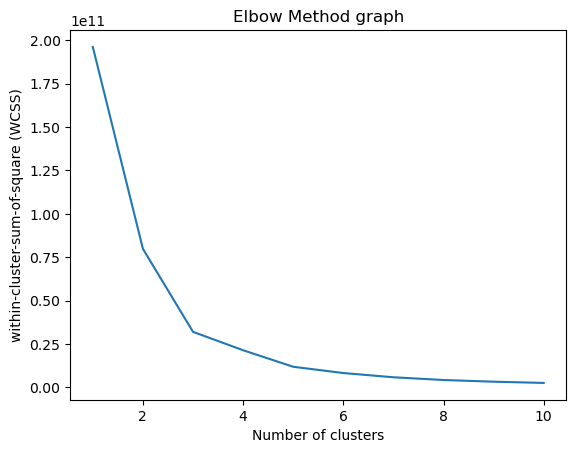

In [482]:
plt.plot(range(1, 11), wcss) # the x axis represents the number of clusters, the y axis represents the inertia values for the clusters
plt.title('Elbow Method graph') # Add title to the graph
plt.xlabel('Number of clusters') # add x axis title
plt.ylabel('within-cluster-sum-of-square (WCSS)') # Add y axis title
plt.show() # Show the plot

In [483]:
chosen_k = 3
kmeans = KMeans(n_clusters=chosen_k, random_state=137, n_init='auto')
clusters = kmeans.fit_predict(df_quant)

df_wines_clustered = df_quant.copy()
df_wines_clustered['Cluster'] = clusters

df_wines_clustered.head()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5170a99760>
Traceback (most recent call last):
  File "/home/ricardorompar/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ricardorompar/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ricardorompar/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 605, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ricardorompar/anaconda3/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
         

,PerfScoreID,Salary,DaysLateLast30,Absences,Age,MonthsfromHire,MonthsfromTermination,MonthsSince_LastPerformanceReview,EmpSatisfaction,SpecialProjectsCount,Cluster
0,4,62506,0,1,40,151,-1,59,5,0,0
1,3,104437,0,17,48,105,91,94,3,6,1
2,3,64955,0,3,35,151,136,140,3,0,0
3,3,64991,0,15,35,193,-1,60,5,0,0
4,3,50825,0,2,34,151,88,95,4,0,0


In [484]:
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(df_quant)
reduced_centers = pca.fit_transform(kmeans.cluster_centers_)

fig = px.scatter_3d(data_frame=reduced_data, x=0, y=1, z=2, width=800, height=800, color=clusters, labels={
                     "0": "Principal Component 1",
                     "1": "Principal Component 2",
                     "2": "Principal Component 3"
                 },
                title="Data Visualization PCA - CLUSTERED")
fig.update_coloraxes(showscale=False)
fig.show()